In [40]:
%load_ext watermark
%watermark -a "Chibuzor Enyioko" -d -v -p numpy,pandas,matplotlib,seaborn,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Chibuzor Enyioko

Python implementation: CPython
Python version       : 3.13.7
IPython version      : 9.5.0

numpy     : 2.3.3
pandas    : 2.3.2
matplotlib: 3.10.6
seaborn   : 0.13.2
sklearn   : 1.7.2



# Project 1: Decision Trees with Zombies

This notebook explores the zombie data set in order to develop a decision tree model that predicts whether an individual is infected or not based on patterns observed in the provided features. 

## Part 1: Descriptive Analysis

To build a foundation for understanding the data, a descriptive analysis is performed. A histogram of each feature is used to examine their distributions and identify potential relationships.

In [41]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

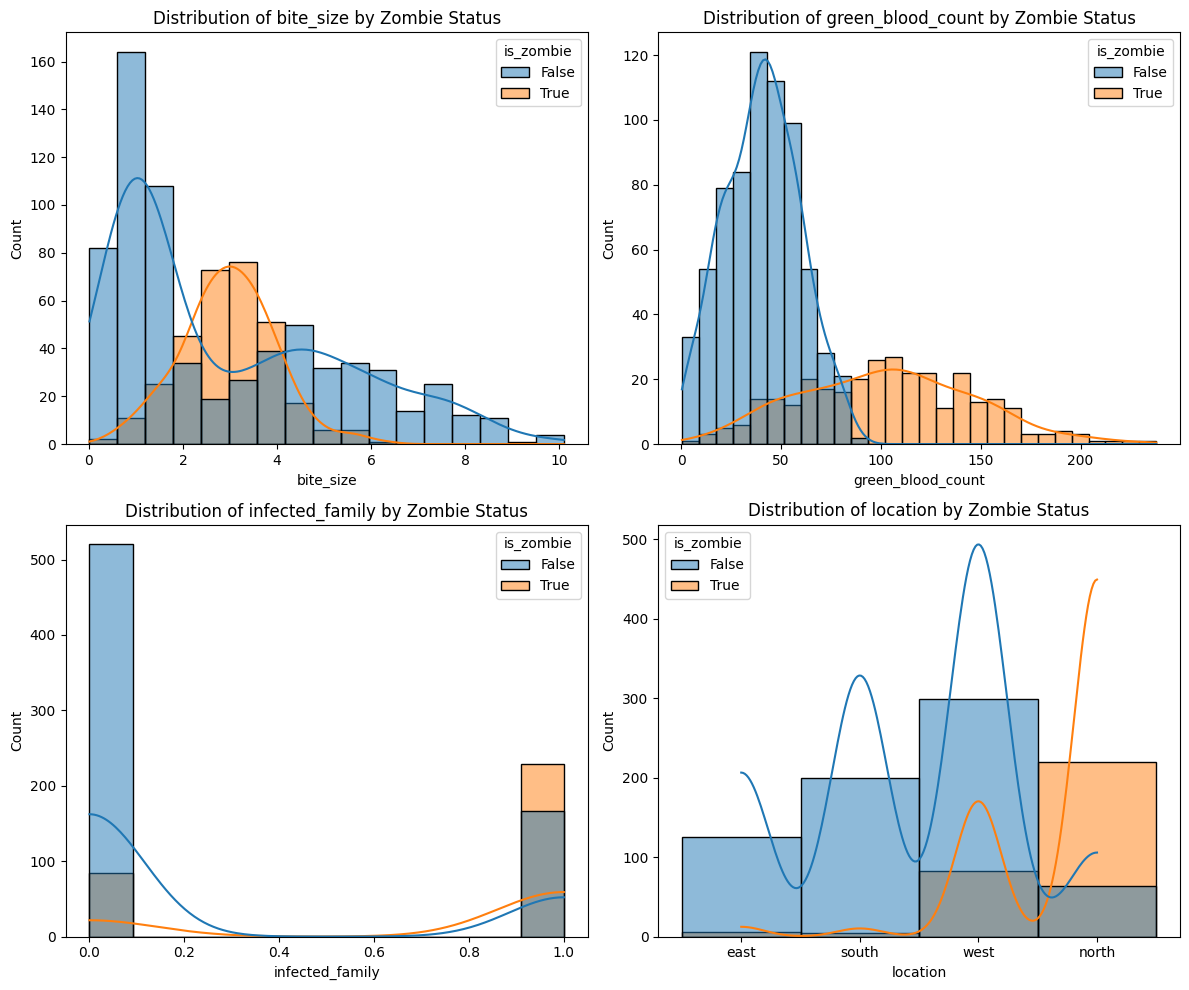

In [42]:
# imoprt zombie training dataset
zombie_df = pd.read_csv('training.csv')

plt_columns = ['bite_size','green_blood_count','infected_family','location']
num_cols = len(plt_columns)

# create subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(plt_columns):
    sns.histplot(zombie_df, x=col, hue='is_zombie', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Zombie Status')

plt.tight_layout()
plt.show()

### Summary

From the data, it is observed that:
- Individuals with bites about 2-4 inches wide are likely zombies
- Individuals with <80 cells per thousand is are most likely safe
- Infected family memebers increases the likelihood of being a zombie
- An individual from the North side of the city is likely to be infected
- Green blood and being from the North may carry significant weight in predicting zombie infection

## Part 2: Making the Decision Tree
### Bulding the Model
From here, a model is built based on the training set.


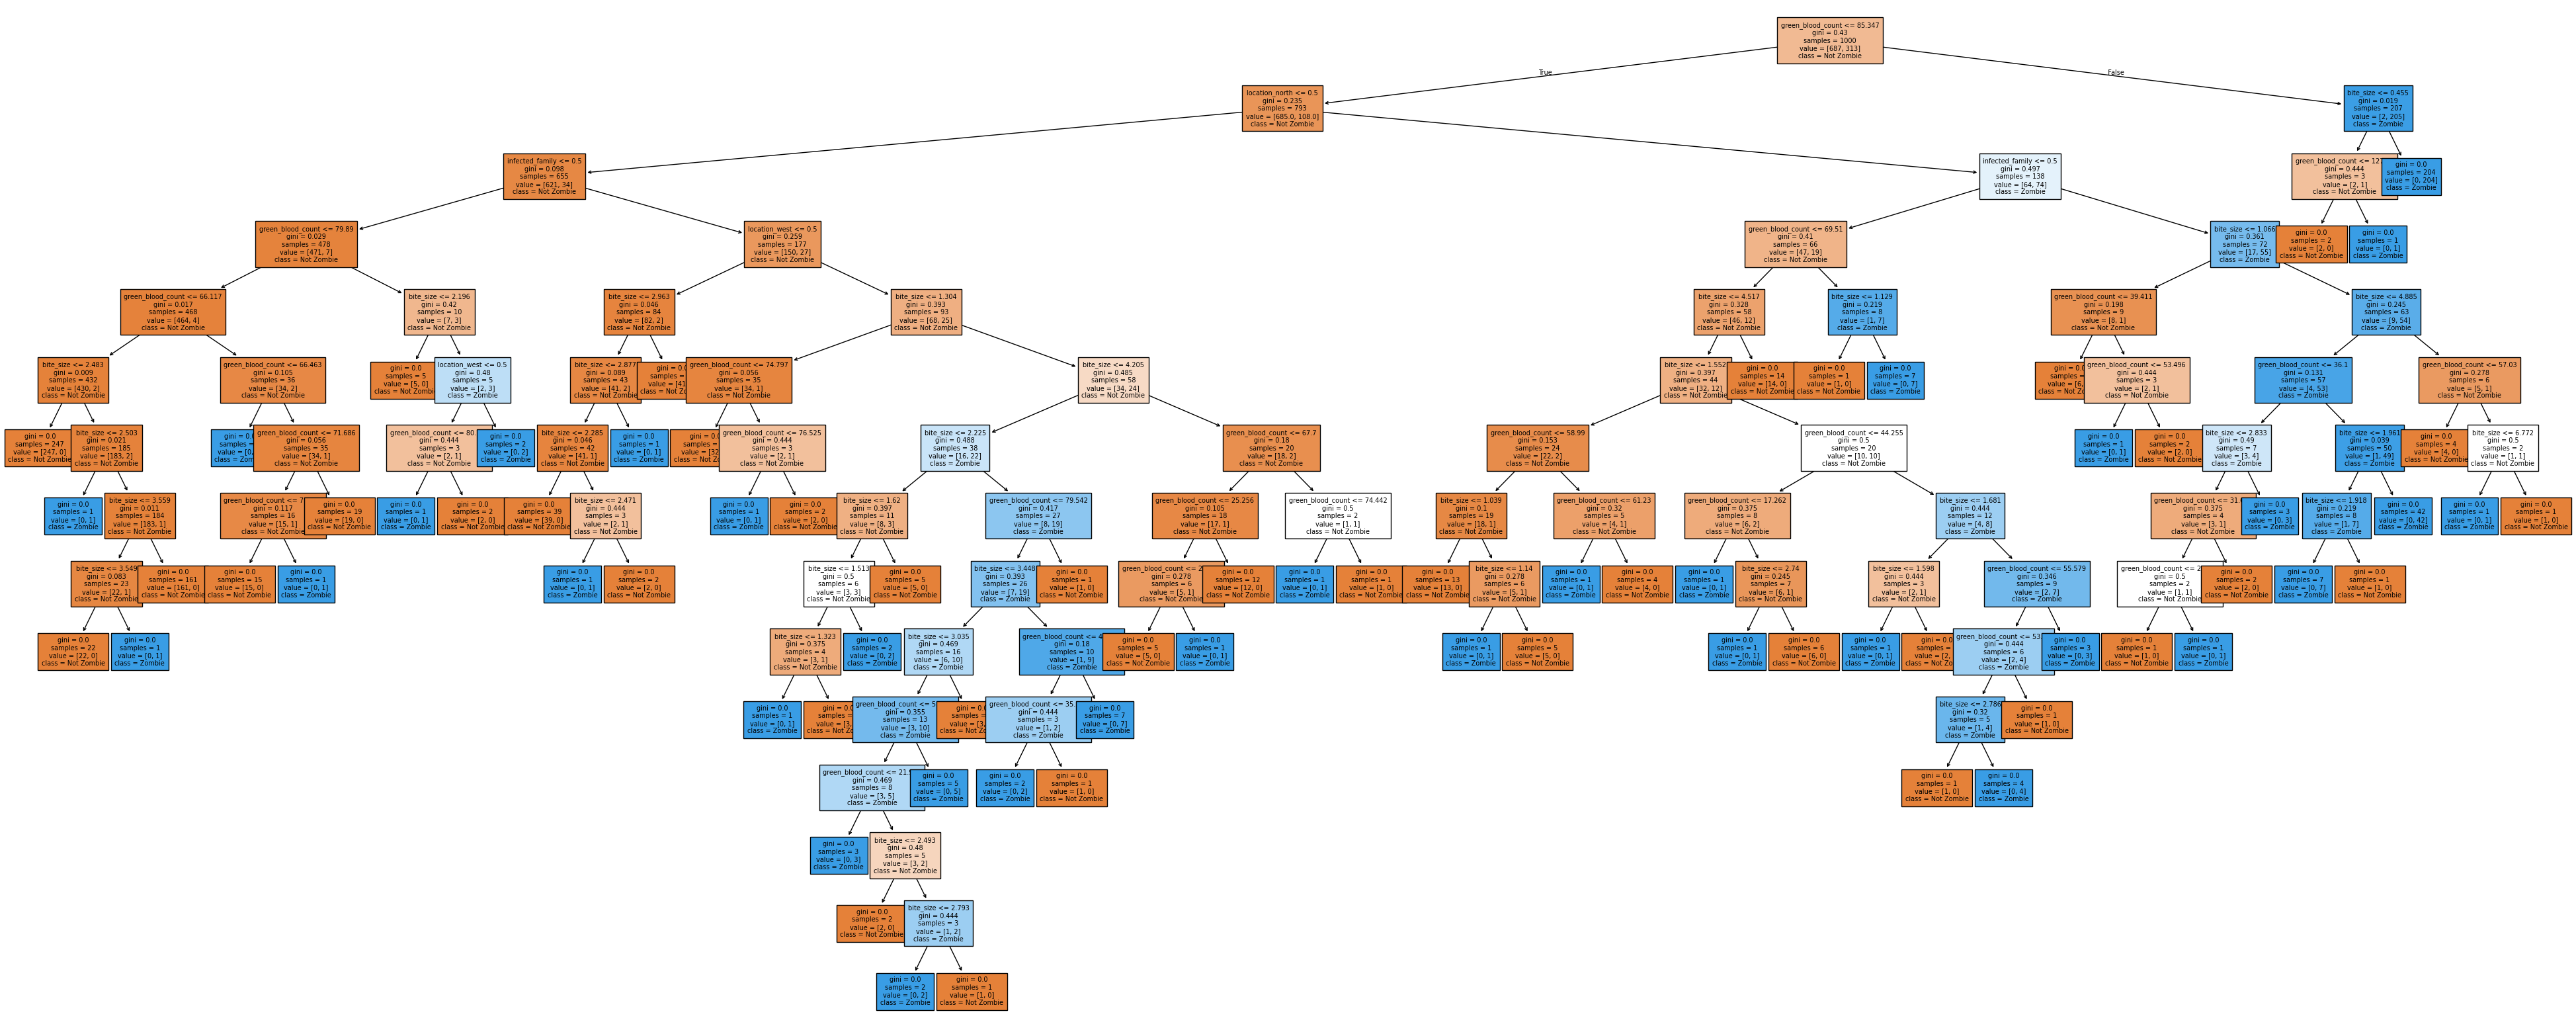

'              precision    recall  f1-score   support\n\n       False       1.00      1.00      1.00       687\n        True       1.00      1.00      1.00       313\n\n    accuracy                           1.00      1000\n   macro avg       1.00      1.00      1.00      1000\nweighted avg       1.00      1.00      1.00      1000\n'

In [47]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix


x = zombie_df.drop(columns=['is_zombie'])
y = zombie_df['is_zombie']

# encode categorical variables as numeric values
x_encoded = pd.get_dummies(x, drop_first=True)

# fitting the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(x_encoded, y)

# visualize the decision tree
plt.figure(figsize=(50,20))
plot_tree(clf, feature_names=x_encoded.columns, class_names=['Not Zombie', 'Zombie'], filled=True, fontsize=7)
plt.show()  


### Evaluating the model
Now that the model is built, it will be applied to the testing set to determine its accuracy.

In [54]:
#import the testing dataset
test_df = pd.read_csv('testing.csv')
x_test = test_df.drop(columns=['is_zombie'])
y_test = test_df['is_zombie']
x_test_encoded = pd.get_dummies(x_test, drop_first=True)

# make predictions on the test set
y_pred = clf.predict(x_test_encoded)

A confusion matrix and classification display is generated to understand the evaluation:

              precision    recall  f1-score   support

  Not Zombie       0.94      0.93      0.93       666
      Zombie       0.86      0.88      0.87       334

    accuracy                           0.91      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.91      0.91      0.91      1000



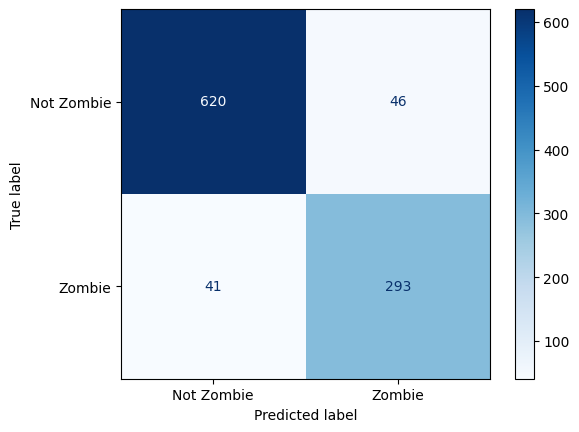

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

# view the classification report
print(classification_report(y_test, y_pred, target_names=['Not Zombie', 'Zombie']))

# print the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Zombie', 'Zombie'])
disp.plot(cmap=plt.cm.Blues)
plt.show()



Recall, in this case, reflects the models accuracy in detecting 'non-zombies' from actual zombies (True Positives/(True Positives/False Negatives)), which in this case is 93%, a high sensitivity.
